# <p style="background-color:#B0766D;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EuroMart Sales & Profitability Analysis</p>

- Identify key factors influencing sales and profitability in different regions, product categories, and transaction types to optimize operations and pricing strategies.

- Identifying Top Performers: Pinpoint regions, product categories, and transaction types driving highest sales & profitability to replicate successful strategies.
- Understanding Challenges: Address operational inefficiencies and customer engagement issues in underperforming areas.
- Optimizing Discounts & Shipping Modes: Analyze impact of discounts and shipping modes to refine pricing strategies and logistics for max profitability.
- Leveraging Customer Feedback: Use customer feedback to enhance product offerings and improve overall business performance.
Improving Product Mix: Identify top-selling products and customer preferences to optimize our product mix.

**Note:-** 
- Remove null values and duplicates if Present.

### **Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Importing the necessary libraries to establish a connection with the MySQL server, enabling exploratory data analysis (EDA) to gain insights from the dataset.

In [2]:
Conn = mysql.connector.connect(
  host="localhost",               #hostname
  user="root",                   # the user who has privilege to the db
  passwd="Sameer@786",               #password for user
  database="eda_practice",               #database name
)

### **Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [3]:
query = "select * from euromart_stores;"

df = pd.read_sql(query,Conn)
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8047 non-null   object 
 1   Order Date     8047 non-null   object 
 2   Customer Name  8047 non-null   object 
 3   Country        8047 non-null   object 
 4   State          8047 non-null   object 
 5   City           8047 non-null   object 
 6   Region         8047 non-null   object 
 7   Segment        8047 non-null   object 
 8   Ship Mode      8047 non-null   object 
 9   Category       8047 non-null   object 
 10  Sub-Category   8047 non-null   object 
 11  Product Name   8047 non-null   object 
 12  Discount       8047 non-null   float64
 13  Sales          8047 non-null   int64  
 14  Profit         8047 non-null   int64  
 15  Quantity       8047 non-null   int64  
 16  Feedback?      8047 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 1.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,8047.0,0.110047,0.181773,0.0,0.0,0.0,0.1,0.85
Sales,8047.0,291.845657,485.212156,3.0,48.0,117.0,313.0,6517.00
Profit,8047.0,35.198211,178.125844,-3060.0,1.0,14.0,47.0,2476.00
Quantity,8047.0,3.772089,2.203369,1.0,2.0,3.0,5.0,14.00


In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

In [7]:
df.shape

(8047, 17)

In [8]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [9]:
df.duplicated().sum()

2

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
for col in df.columns:
    print(df[col].unique())

['BN-2011-7407039' 'AZ-2011-9050313' 'AZ-2011-6674300' ...
 'AZ-2014-7604524' 'AZ-2014-766953' 'BN-2014-4140795']
['2011-01-01' '2011-01-03' '2011-01-04' ... '2014-12-29' '2014-12-30'
 '2014-12-31']
['Ruby Patel' 'Summer Hayward' 'Devin Huddleston' 'Mary Parker'
 'Daniel Burke' 'Fredrick Beveridge' 'Archer Hort' 'Evie Flockhart'
 'Faith Greenwood' 'Gracie Powell' 'Hershel Snyder' 'Julia Martell'
 'Viola Watson' 'Julian Dobie' 'Rose Heap' 'Ella Troy' 'Everett Dunbar'
 'Georgia Bermingham' 'Christopher Goold' 'John Baca' 'Kai Leonard'
 'Jennifer Mattingly' 'Nathan Iqbal' 'Noah Chamberlain' 'Dylan Disney'
 'Melissa Bean' 'Vaughn Gibbs' 'William Horton' 'David Harney'
 'Walter Coley' 'Lori Miller' 'Hayley Baldwinson' 'Joseph Locke'
 'Gracie Hicks' 'Hollie Norris' 'Kiara Allen' 'Ronald Everson'
 'Daryl Claypool' 'Caleb Kenyon' 'Winnie Moss' 'Courtney Hancock'
 'Brandon Preston' 'Lara Stoate' 'Max Ludwig' 'Millie Newman'
 'Larry Klaus' 'Shelby Dunston' 'Erin Gill' 'Piper Wilder-Neligan'
 'Pa

In [13]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

### removing Unnecessory columns

In [14]:
df.drop(['Order ID'],axis=1, inplace =True)

In [15]:
df.columns

Index(['Order Date', 'Customer Name', 'Country', 'State', 'City', 'Region',
       'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name',
       'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

In [16]:
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


### **Feature gineering**

In [17]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [18]:
df.head()

,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month
0,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False,2011,1
1,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True,2011,1
2,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True,2011,1
3,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True,2011,1
4,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True,2011,1


In [19]:
df['Year'].unique()

array([2011, 2012, 2013, 2014])

In [20]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Api', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [22]:
df['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
8042    Dec
8043    Dec
8044    Dec
8045    Dec
8046    Dec
Name: Month, Length: 8045, dtype: object

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,8045.0,0.110075,0.181787,0.0,0.0,0.0,0.1,0.85
Sales,8045.0,291.903170,485.258616,3.0,48.0,117.0,313.0,6517.00
Profit,8045.0,35.202237,178.147747,-3060.0,1.0,14.0,47.0,2476.00
Quantity,8045.0,3.772281,2.203610,1.0,2.0,3.0,5.0,14.00
Year,8045.0,2012.728900,1.100367,2011.0,2012.0,2013.0,2014.0,2014.00


In [24]:
cat = df.select_dtypes(include='object').columns
num  = df.select_dtypes(exclude='object').columns.tolist()
print(cat)
print(num)

Index(['Order Date', 'Customer Name', 'Country', 'State', 'City', 'Region',
       'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name',
       'Feedback?', 'Month'],
      dtype='object')
['Discount', 'Sales', 'Profit', 'Quantity', 'Year']


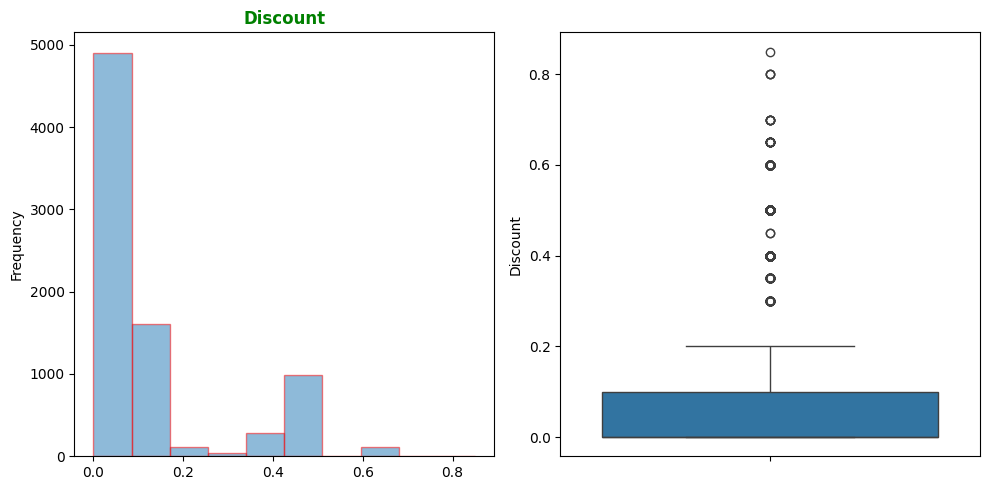

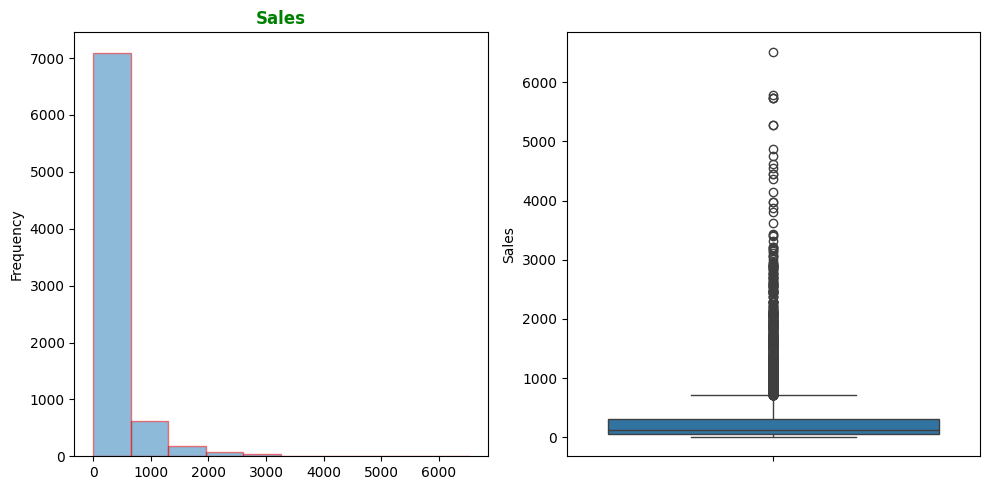

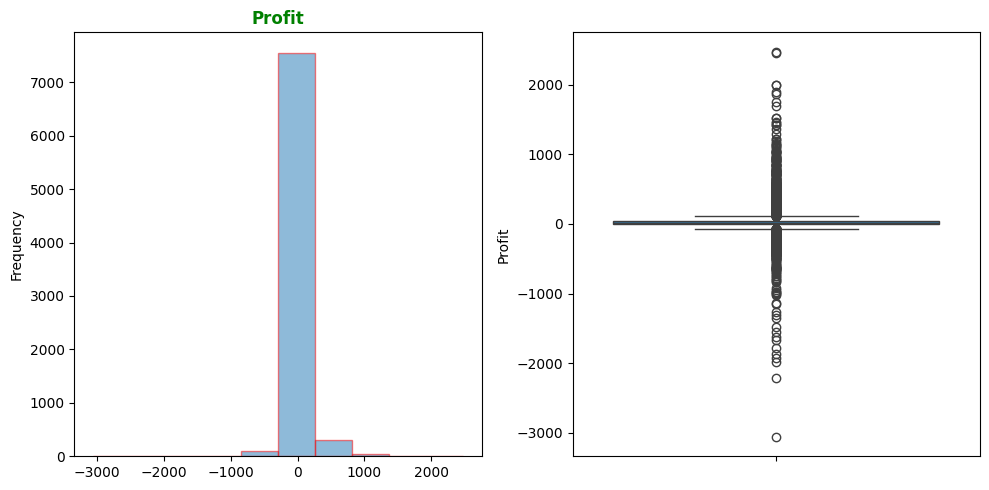

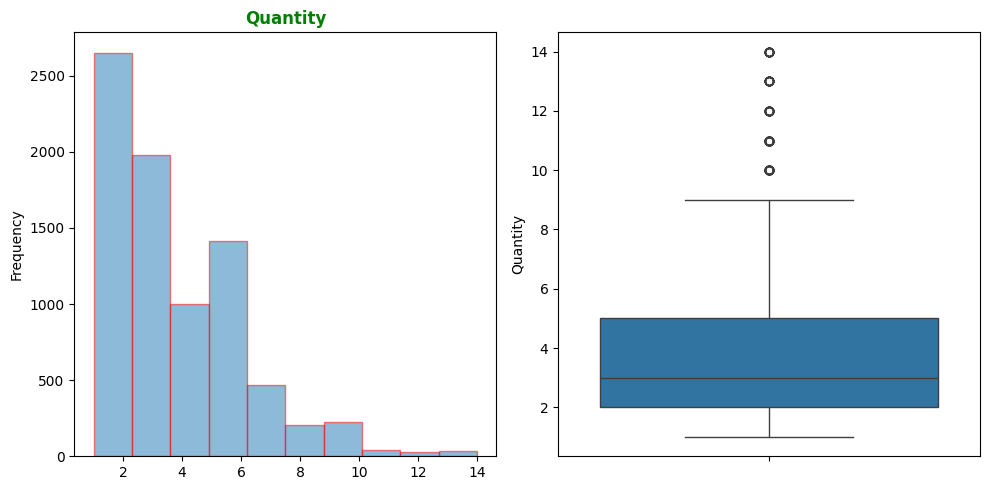

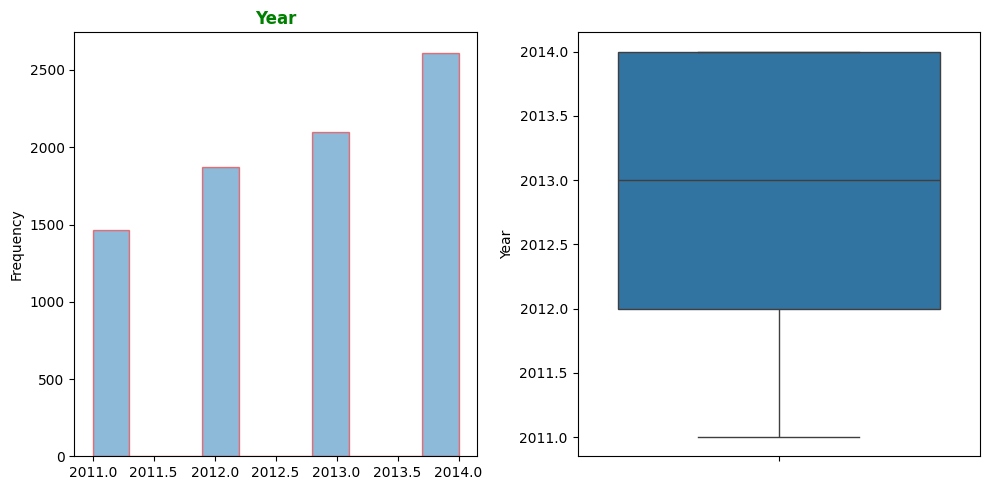

In [25]:
# Univariate Analysis fot numarical veriable
for col in num:
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=10, alpha=0.5, edgecolor='red')
    plt.ylabel('Frequency')
    plt.title(col, fontsize=12, fontweight='bold', color='green')

    plt.subplot(1,2,2)
    sns.boxplot(y=col, data=df)

    plt.tight_layout()
    plt.show()

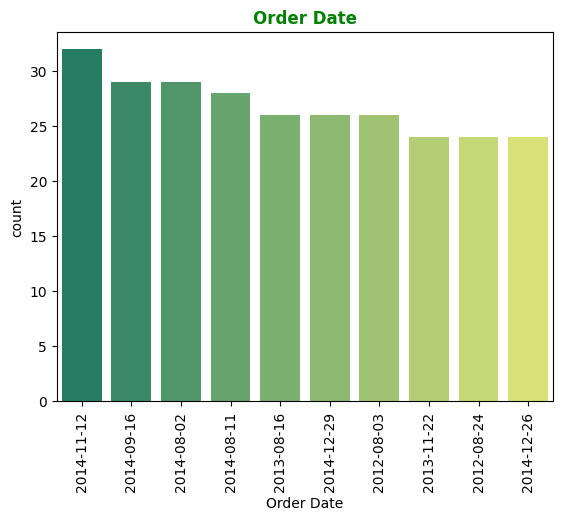

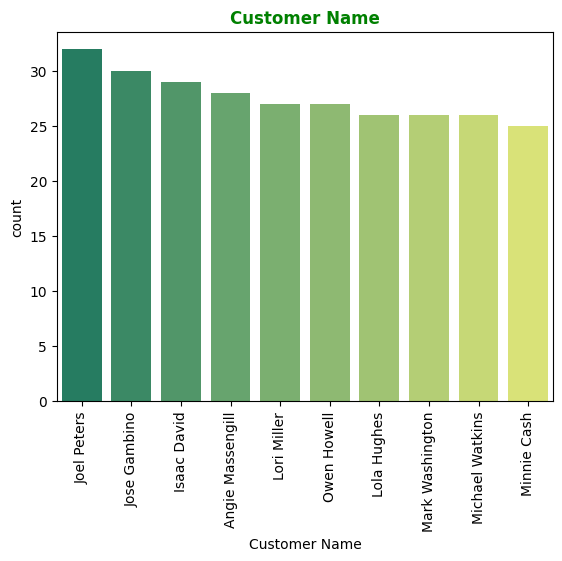

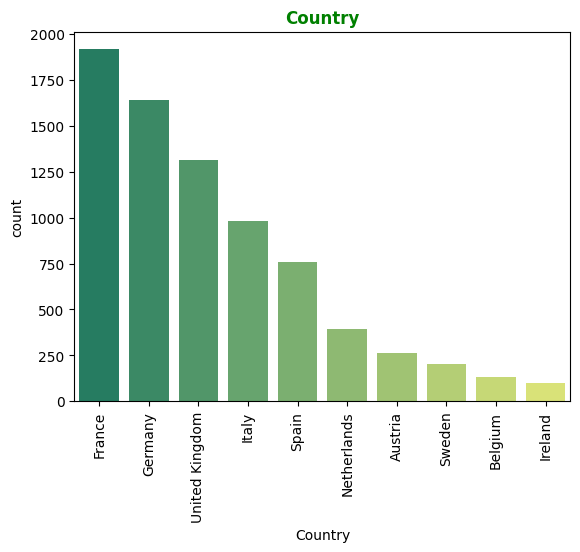

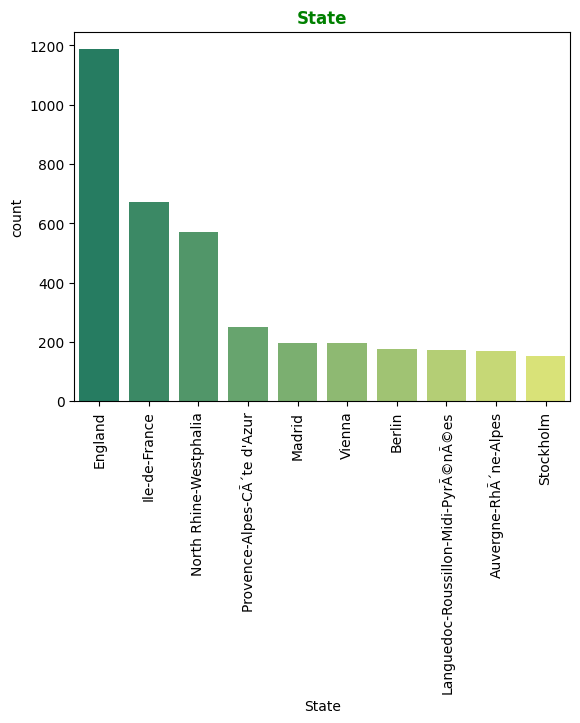

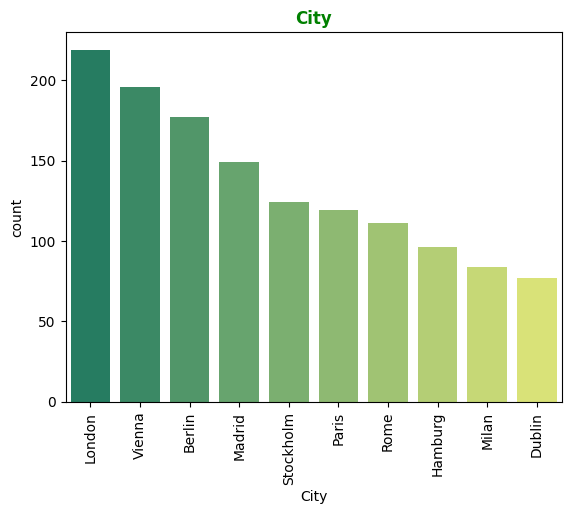

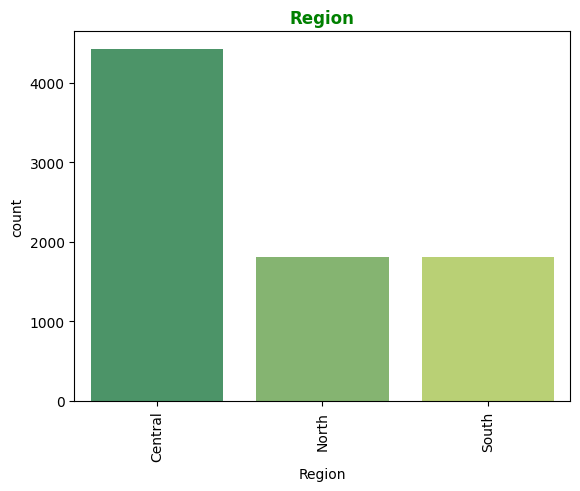

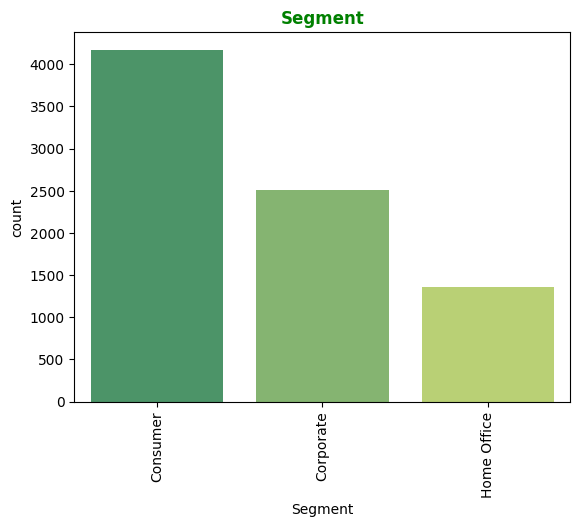

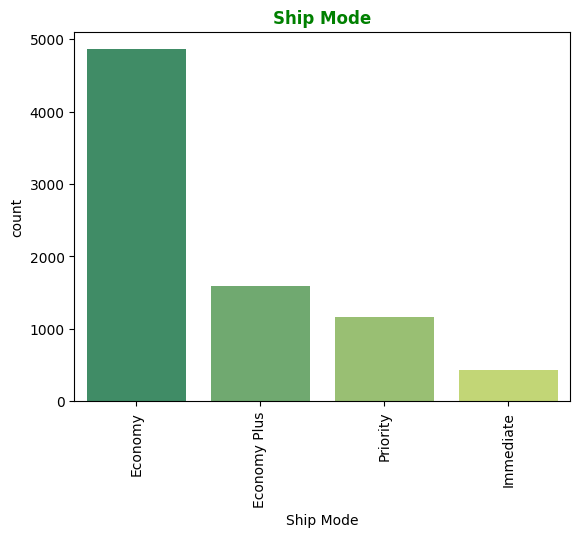

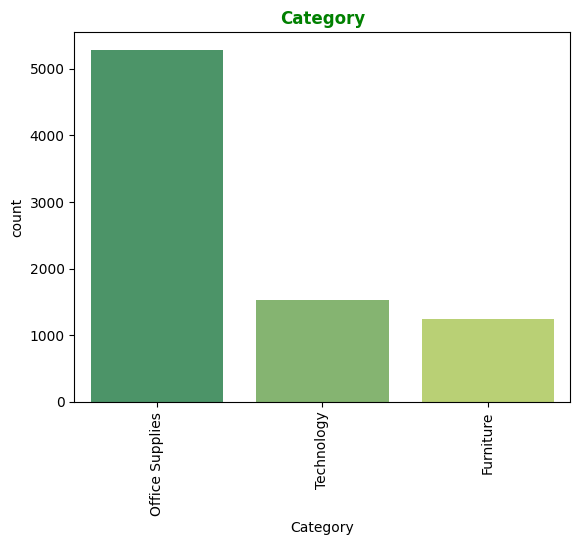

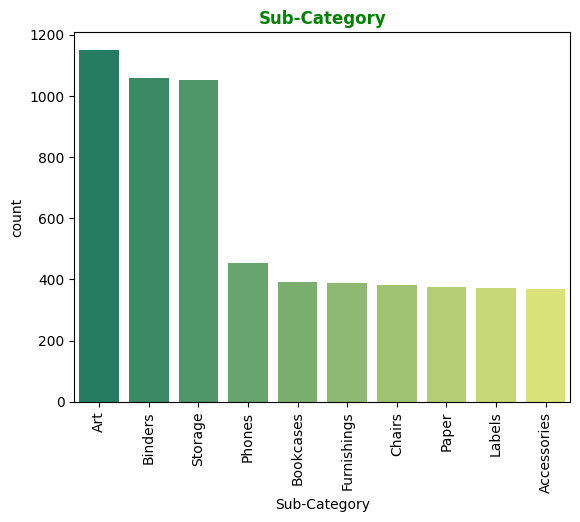

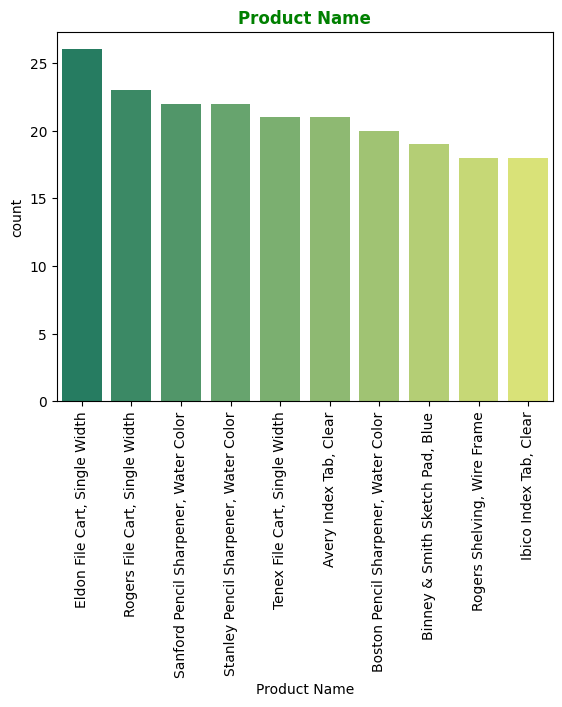

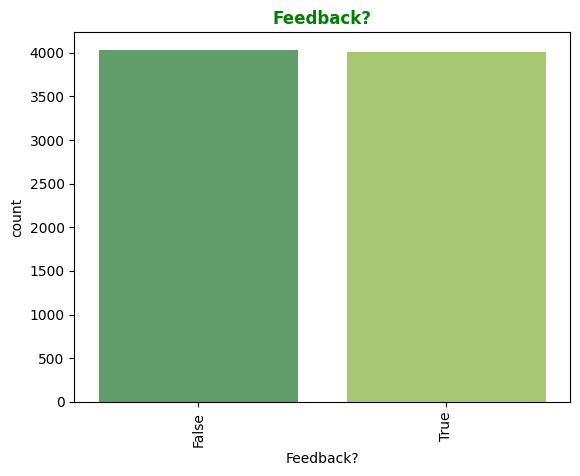

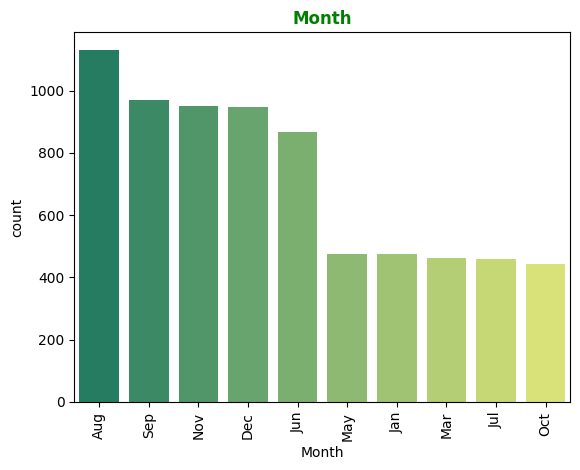

In [26]:
for col in cat:
    plt.figure()
    plt.subplot(1,1,1)
    sns.countplot(x=col, data = df, order=df[col].value_counts().head(10).index, palette='summer')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, fontweight='bold', color='green')
    plt.show()

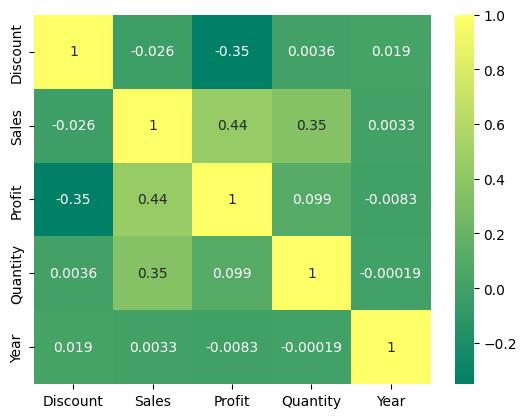

In [28]:
cor = df[num].corr('pearson')
sns.heatmap(cor, annot=True, cmap='summer')
plt.show()